In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
CardiovascularDS = pd.read_csv('./DataScience/HealthData/CardiovascularDisease.csv',sep=";")
CardiovascularDS.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.

The Problem Statement:
To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes.

In [4]:
CardiovascularDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
CardiovascularDS.drop("id",axis=1,inplace=True)

In [6]:
print("There is {} missing values in data frame".format(CardiovascularDS.isnull().sum().sum()))
CardiovascularDS.isnull().sum()

There is 0 missing values in data frame


age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
print("There is {} duplicated values in data frame".format(CardiovascularDS.duplicated().sum()))

There is 24 duplicated values in data frame


In [8]:
CardiovascularDS.drop_duplicates(inplace=True)
print("There is {} duplicated values in data frame".format(CardiovascularDS.duplicated().sum()))

There is 0 duplicated values in data frame


In [9]:
CardiovascularDS.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
CardiovascularDS.shape

(69976, 12)

In [11]:
# Rename columns to make features more clearly understood
CardiovascularDS.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic', 'gluc': 'glucose', 'alco': 'alcohol', 'cardio': 'cardiovascular disease'}, inplace=True)

In [12]:
CardiovascularDS.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


To Identify Gender (Male ,Female) , we will check the High and Alcohole features , as Male are more hight than femal and dring more alchohle than female

In [13]:
CardiovascularDS.groupby('gender')['height'].mean()

gender
1    161.354347
2    169.948134
Name: height, dtype: float64

In [14]:
CardiovascularDS.groupby('gender')['alcohol'].sum()

gender
1    1161
2    2603
Name: alcohol, dtype: int64

In [15]:
#To see how the target class is distributed among men and women, we can use also crosstab

pd.crosstab(CardiovascularDS['cardiovascular disease'],CardiovascularDS['gender'],normalize=True)

gender,1,2
cardiovascular disease,,
0,0.327241,0.172988
1,0.323111,0.176661


2 Is Male and 1 is female

In [16]:
# Extact a new feild Year  from age feild, where the age represent number of days

CardiovascularDS['age_year'] = (CardiovascularDS['age'] / 365).round().astype('int')

In [17]:
CardiovascularDS.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease,age_year
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


In [18]:

# According to US National Library of Medicine National Institutes of Health the age groups are classified
def age_category(age):
  if 0 < age <= 2:
    return "Infants"
  elif 2 < age <= 5:
    return "Pre School Child"
  elif 5 < age <= 12:
    return "Child"
  elif 12 < age <= 19:
    return "Adolescent"
  elif 19 < age <= 24:
    return "Young Adult"
  elif 24 < age <= 44:
    return "Adult"
  elif 44 < age <= 65:
    return "Middle Aged"
  elif 65 < age:
    return "Aged"


In [19]:

def age_tees_categorize(age):
  if 0 < age <= 10:
    return "10s"
  elif 10 < age <= 30:
    return "20s"
  elif 20 < age <= 30:
    return "30s"
  elif 30 < age <= 40:
    return "40s"
  elif 40 < age <= 50:
    return "50s"
  elif 50 < age <= 60:
    return "60s"
  elif 60 < age <= 70:
    return "70+"

In [20]:
def cardiovasculardisease_categorize(v_cardiovasculardisease):
  if v_cardiovasculardisease==0:
    return "Not Have CVD"
  elif v_cardiovasculardisease==1:
    return "Have CVD"
  

In [21]:
def gender_categorize(v_gender):
  if v_gender==2:
    return "Male"
  elif v_gender==1:
    return "Female"

In [22]:
def smoke_categorize(v_smoke):
  if v_smoke==0:
    return "Not a Smoker"
  elif v_smoke==1:
    return "Smoker"

In [23]:
def alchoalic_categorize(v_alchoalic):
  if v_alchoalic==0:
    return "Not a Alchoalic"
  elif v_alchoalic==1:
    return "Alchoalic"

In [24]:
def Glucose_categorize(v_Glucose):
  if v_Glucose==1:
    return "normal"
  elif v_Glucose==2:
    return "above normal"
  elif v_Glucose==3:
    return "well above normal"

In [25]:
def cholesterol_categorize(v_cholesterol):
  if v_cholesterol==1:
    return "normal"
  elif v_cholesterol==2:
    return "above normal"
  elif v_cholesterol==3:
    return "well above normal"

In [26]:
def Active_categorize(v_active):
  if v_active==0:
    return "Not involved in Physical Activites'"
  elif v_active==1:
    return "involved in physical activites'"
  

In [27]:
CardiovascularDS['age_cat'] = CardiovascularDS['age_year'].apply(lambda x: age_category(x))
CardiovascularDS['age_tees'] = CardiovascularDS['age_year'].apply(lambda x: age_tees_categorize(x))
CardiovascularDS.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease,age_year,age_cat,age_tees
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,Middle Aged,50s
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,Middle Aged,60s
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,Middle Aged,60s
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,Middle Aged,50s
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,Middle Aged,50s


In [28]:
CardiovascularDS['CVD_cat'] = CardiovascularDS['cardiovascular disease'].apply(lambda x: cardiovasculardisease_categorize(x))
CardiovascularDS['Gender_cat'] = CardiovascularDS['gender'].apply(lambda x: gender_categorize(x))
CardiovascularDS['smoke_cat'] = CardiovascularDS['smoke'].apply(lambda x: smoke_categorize(x))
CardiovascularDS['alchoalic_cat'] = CardiovascularDS['alcohol'].apply(lambda x: alchoalic_categorize(x))
CardiovascularDS['Glucose_cat'] = CardiovascularDS['glucose'].apply(lambda x: Glucose_categorize(x))
CardiovascularDS['cholesterol_cat'] = CardiovascularDS['cholesterol'].apply(lambda x: cholesterol_categorize(x))
CardiovascularDS.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,...,cardiovascular disease,age_year,age_cat,age_tees,CVD_cat,Gender_cat,smoke_cat,alchoalic_cat,Glucose_cat,cholesterol_cat
0,18393,2,168,62.0,110,80,1,1,0,0,...,0,50,Middle Aged,50s,Not Have CVD,Male,Not a Smoker,Not a Alchoalic,normal,normal
1,20228,1,156,85.0,140,90,3,1,0,0,...,1,55,Middle Aged,60s,Have CVD,Female,Not a Smoker,Not a Alchoalic,normal,well above normal
2,18857,1,165,64.0,130,70,3,1,0,0,...,1,52,Middle Aged,60s,Have CVD,Female,Not a Smoker,Not a Alchoalic,normal,well above normal
3,17623,2,169,82.0,150,100,1,1,0,0,...,1,48,Middle Aged,50s,Have CVD,Male,Not a Smoker,Not a Alchoalic,normal,normal
4,17474,1,156,56.0,100,60,1,1,0,0,...,0,48,Middle Aged,50s,Not Have CVD,Female,Not a Smoker,Not a Alchoalic,normal,normal


In [29]:
CardiovascularDS['active_cat'] = CardiovascularDS['active'].apply(lambda x: Active_categorize(x))
CardiovascularDS.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,...,age_year,age_cat,age_tees,CVD_cat,Gender_cat,smoke_cat,alchoalic_cat,Glucose_cat,cholesterol_cat,active_cat
0,18393,2,168,62.0,110,80,1,1,0,0,...,50,Middle Aged,50s,Not Have CVD,Male,Not a Smoker,Not a Alchoalic,normal,normal,involved in physical activites'
1,20228,1,156,85.0,140,90,3,1,0,0,...,55,Middle Aged,60s,Have CVD,Female,Not a Smoker,Not a Alchoalic,normal,well above normal,involved in physical activites'
2,18857,1,165,64.0,130,70,3,1,0,0,...,52,Middle Aged,60s,Have CVD,Female,Not a Smoker,Not a Alchoalic,normal,well above normal,Not involved in Physical Activites'
3,17623,2,169,82.0,150,100,1,1,0,0,...,48,Middle Aged,50s,Have CVD,Male,Not a Smoker,Not a Alchoalic,normal,normal,involved in physical activites'
4,17474,1,156,56.0,100,60,1,1,0,0,...,48,Middle Aged,50s,Not Have CVD,Female,Not a Smoker,Not a Alchoalic,normal,normal,Not involved in Physical Activites'


Filter out the following patient segments (we consider these as erroneous data)

diastolic pressure is higher than systolic
height is strictly less than 2.5 percentile (Use pd.Series.quantile to compute this value. If you are not familiar with the function, please read the docs.)
height is strictly more than 97.5 percentile
weight is strictly less than 2.5 percentile
weight is strictly more than 97.5 percentile

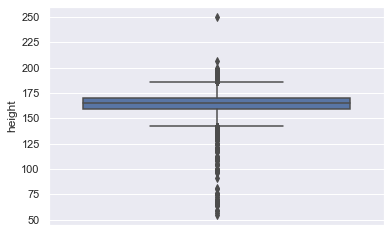

In [30]:
sns.boxplot( y=CardiovascularDS["height"] )

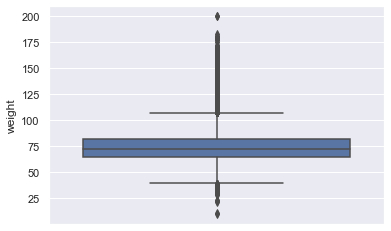

In [31]:
sns.boxplot( y=CardiovascularDS["weight"] )

In [32]:
CardiovascularDS.drop(CardiovascularDS[(CardiovascularDS['height'] > CardiovascularDS['height'].quantile(0.975)) | (CardiovascularDS['height'] < CardiovascularDS['height'].quantile(0.025))].index,inplace=True)
CardiovascularDS.drop(CardiovascularDS[(CardiovascularDS['weight'] > CardiovascularDS['weight'].quantile(0.975)) | (CardiovascularDS['weight'] < CardiovascularDS['weight'].quantile(0.025))].index,inplace=True)

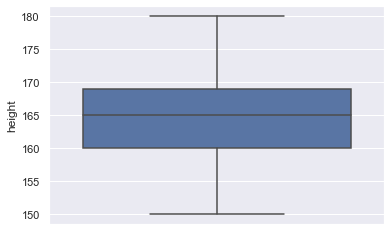

In [33]:
sns.boxplot( y=CardiovascularDS["height"] )

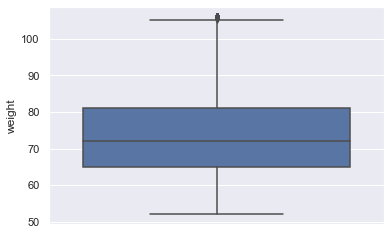

In [34]:
sns.boxplot( y=CardiovascularDS["weight"] )

For Systolic blood pressure , the range should be 120 - 180 mm.
For Diastolic blood pressure , the range should be 80 - 120 mm.

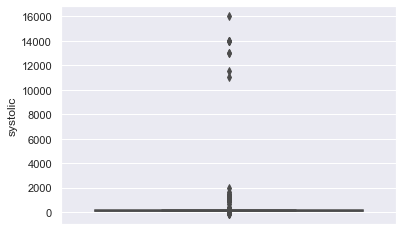

In [35]:
sns.boxplot( y=CardiovascularDS["systolic"] )

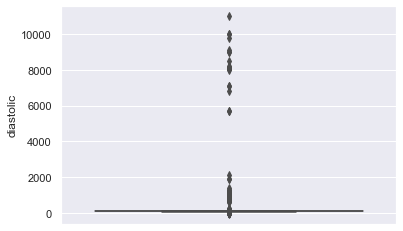

In [36]:
sns.boxplot( y=CardiovascularDS["diastolic"] )

In [37]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(CardiovascularDS[CardiovascularDS['diastolic']> CardiovascularDS['systolic']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


In [38]:
CardiovascularDS.drop(CardiovascularDS[CardiovascularDS['diastolic']> CardiovascularDS['systolic']].index,inplace=True)

'ap_hi': 'systolic', 'ap_lo': 'diastolic'

In [39]:
CardiovascularDS.drop(CardiovascularDS[(CardiovascularDS['systolic'] > CardiovascularDS['systolic'].quantile(0.975)) | (CardiovascularDS['systolic'] < CardiovascularDS['systolic'].quantile(0.025))].index,inplace=True)
CardiovascularDS.drop(CardiovascularDS[(CardiovascularDS['diastolic'] > CardiovascularDS['diastolic'].quantile(0.975)) | (CardiovascularDS['diastolic'] < CardiovascularDS['diastolic'].quantile(0.025))].index,inplace=True)

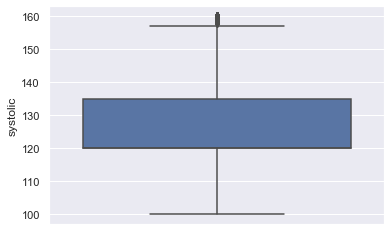

In [40]:
sns.boxplot( y=CardiovascularDS["systolic"] )

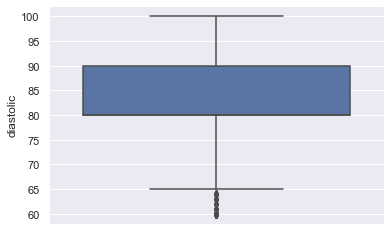

In [41]:
sns.boxplot( y=CardiovascularDS["diastolic"] )

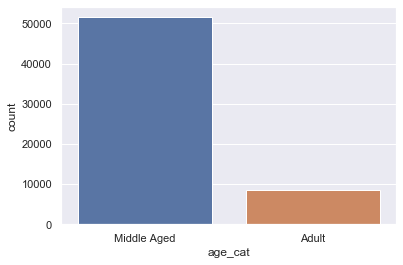

In [42]:
sns.countplot(x ='age_cat', data = CardiovascularDS) 

graph information : the dataset contains majorly of Middle Aged people data and minor of Adult data.

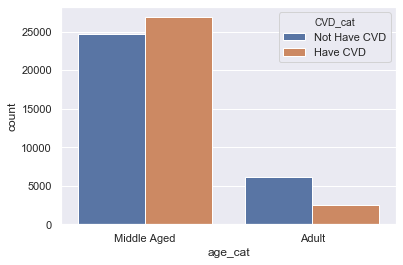

In [43]:
sns.countplot(x ='age_cat', hue = 'CVD_cat', data = CardiovascularDS) 

graph information :middle aged people are affected by Cardiovascular while comparing to Adult

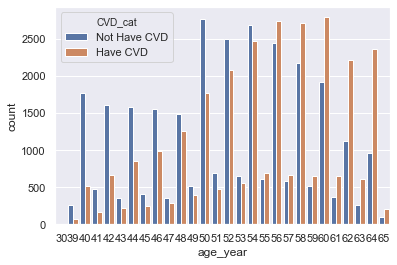

In [44]:
sns.countplot(x='age_year', data=CardiovascularDS, hue='CVD_cat')
plt.show()

graph information : people who are 55 greater in age are more exposed to Cardiovascular

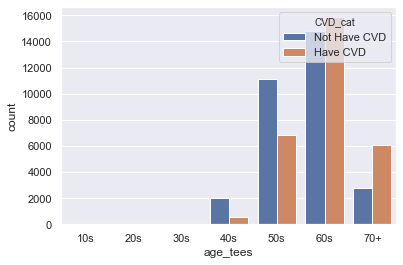

In [45]:
sns.countplot(x='age_tees', hue='CVD_cat', data = CardiovascularDS, order = ['10s','20s','30s','40s','50s','60s','70+']);

graph information :  60s and 70+ ages are more are more exposed to Cardiovascular compare to 40s and 50s.
In Addtion patient in 10s, 20s, 30s category have no Cardiovascular

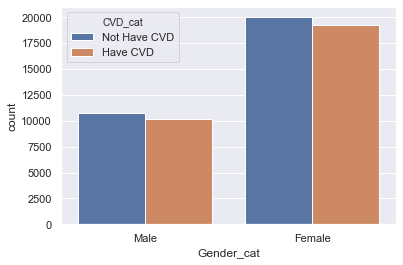

In [46]:
sns.countplot(x='Gender_cat', hue='CVD_cat', data = CardiovascularDS);

graph information : disease label is equally distributed but the gender population is not balanced .

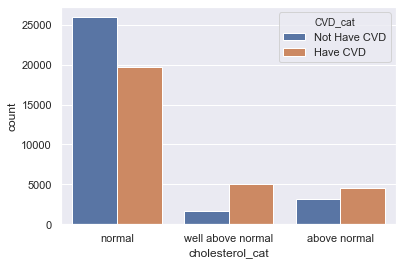

In [47]:
sns.countplot(x='cholesterol_cat', data=CardiovascularDS, hue='CVD_cat')
plt.show()

Graph Information : patients who are having above normal & well above normal are the highest risk patient for cardiovascular 

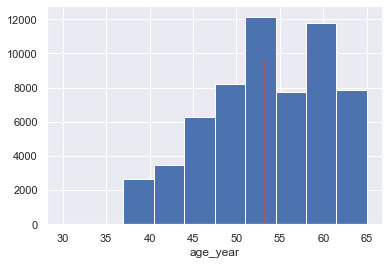

In [48]:
CardiovascularDS.age_year.hist()
plt.xlabel("age_year");
plt.axvline(CardiovascularDS.age_year.mean(), 0, 0.75, color='r', label='Mean')
sns.despine()

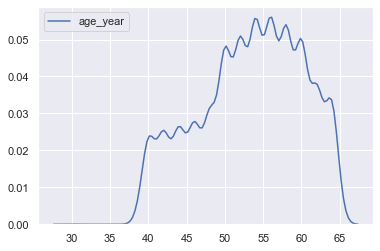

In [49]:
sns.kdeplot(CardiovascularDS.age_year);


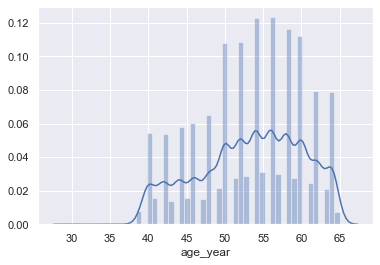

In [50]:
sns.distplot(CardiovascularDS.age_year);

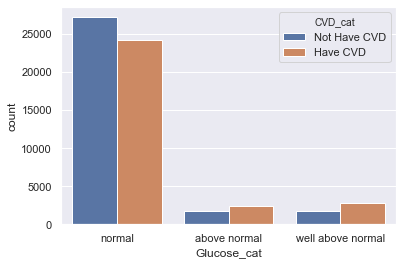

In [51]:
sns.countplot(x='Glucose_cat', data=CardiovascularDS, hue='CVD_cat')
plt.show()



Graph Information : normal glucose level and abnormal patients have high risk to cardiovascular.

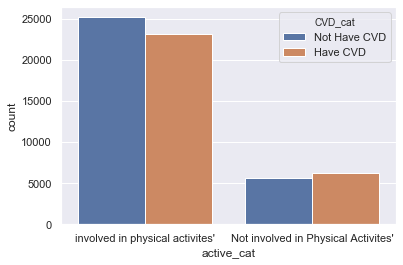

In [52]:
sns.countplot(x='active_cat', data=CardiovascularDS, hue='CVD_cat')
plt.show()

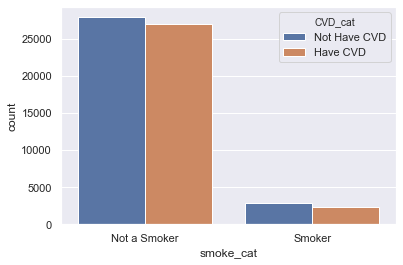

In [53]:
sns.countplot(x='smoke_cat', data=CardiovascularDS, hue='CVD_cat')
plt.show()

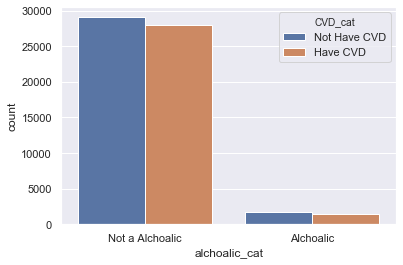

In [54]:
sns.countplot(x='alchoalic_cat', data=CardiovascularDS, hue='CVD_cat')
plt.show()

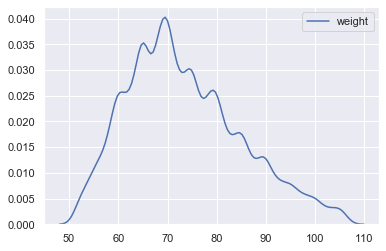

In [55]:
sns.kdeplot(CardiovascularDS.weight);

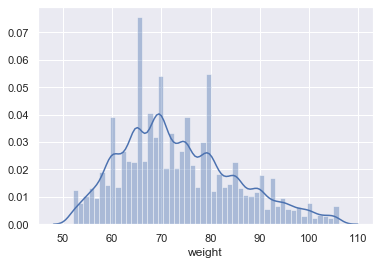

In [56]:
sns.distplot(CardiovascularDS.weight)
plt.show()

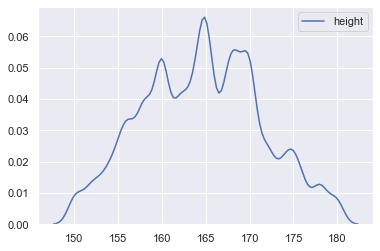

In [57]:
sns.kdeplot(CardiovascularDS.height);

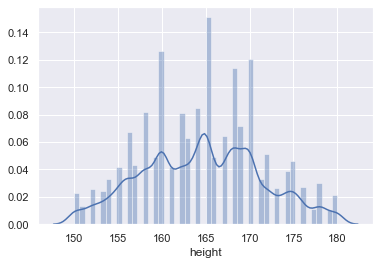

In [58]:
sns.distplot(CardiovascularDS.height)
plt.show()

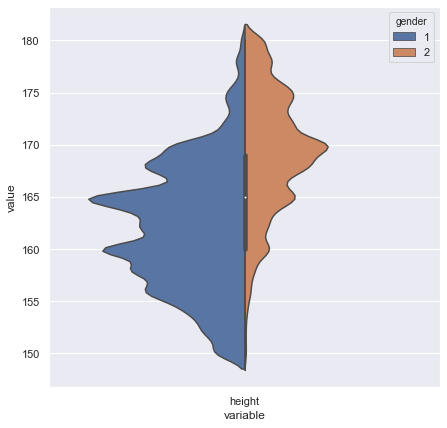

In [59]:
df_melt = pd.melt(frame=CardiovascularDS, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False);

graph information  : the height of 1- female and 2-male are slighlt variated where femal average is around 161 cm and male is around 169

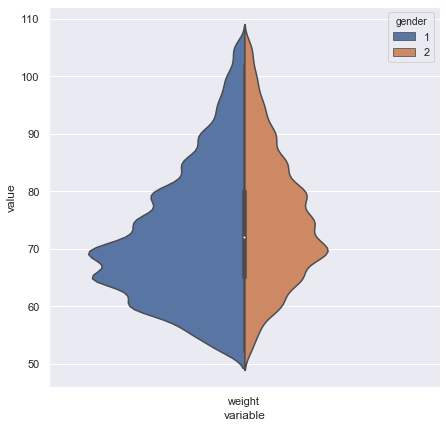

In [60]:
df_melt = pd.melt(frame=CardiovascularDS, value_vars=['weight'], id_vars=['gender'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False);

graph information  : weights both genders are equally distributed 

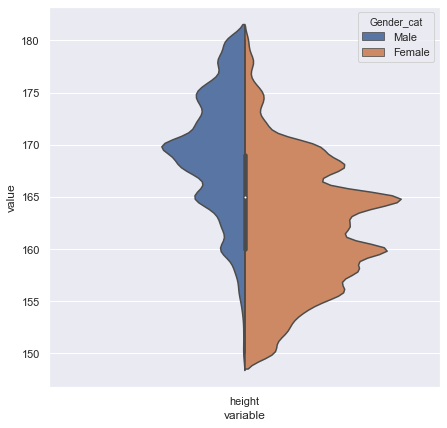

In [61]:
df_melt = pd.melt(frame=CardiovascularDS, value_vars=['height'], id_vars=['Gender_cat'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='Gender_cat', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False);

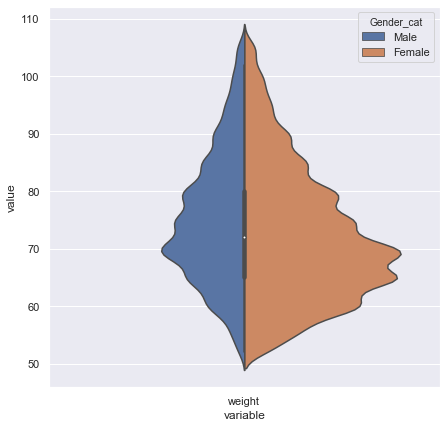

In [62]:
df_melt = pd.melt(frame=CardiovascularDS, value_vars=['weight'], id_vars=['Gender_cat'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='Gender_cat', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False);

calculate the BMI of the patients , the BMI says whether the person is in Normal health or not . 
BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared
Normal BMI values are said to be from 18.5 to 25.

In [63]:

# categorize normal & abnormal
def bmi_category(bmi_score):
  if 18.5 <= bmi_score <= 25:
    return "Normal"
  else:
    return "Abnormal"

In [64]:
# calculate the BMI score 
CardiovascularDS['BMI'] = CardiovascularDS['weight']/((CardiovascularDS['height']/100)**2)

CardiovascularDS["BMIStatus"] = CardiovascularDS["BMI"].apply(lambda x: bmi_category(x))


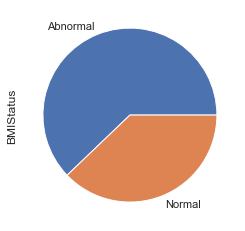

In [65]:
CardiovascularDS["BMIStatus"].value_counts().plot(kind='pie')

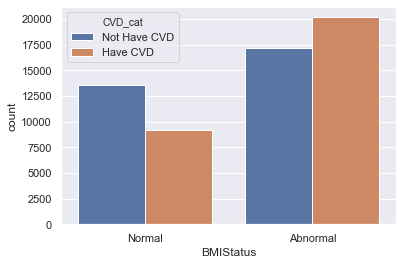

In [66]:
sns.countplot(x='BMIStatus', hue='CVD_cat', data = CardiovascularDS);

graph information : people who follows normal BMI score are less prone to cardiovascular 
and people with abnormal BMI are having increasing cardiovascular.

In [67]:
def categorize_blood_pressure(x):
  if x['systolic'] < 120 and x['diastolic'] < 80:
    return "Normal"
  elif 120 <= x['systolic'] <= 129 and x['diastolic'] < 80:
    return "Elevated"
  elif 130 <= x['systolic'] <= 139 or 80 <= x['diastolic'] <= 89:
    return "High Blood Pressure(Stage 1)"
  elif  140 <= x['systolic'] <= 180 or 90 <= x['diastolic'] <= 120:
    return "High Blood Pressure(Stage 2)"
  elif  (x['systolic'] > 180 and  x['diastolic'] > 120) or (x['systolic'] > 180 or x['diastolic'] > 120):
    return "Hypertensive Crisis"

In [68]:
def pulse(data):
    return np.subtract(data['systolic'], data['diastolic'])
 


In [69]:
CardiovascularDS['blood_category'] = CardiovascularDS.apply(categorize_blood_pressure, axis=1)

In [70]:
CardiovascularDS['pulse'] = CardiovascularDS.apply(pulse, axis=1)

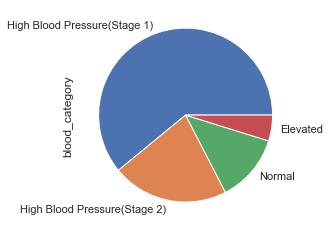

In [71]:
CardiovascularDS["blood_category"].value_counts().plot(kind='pie')


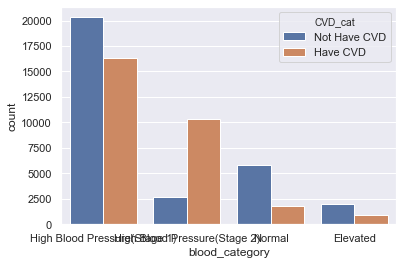

In [72]:
sns.countplot(x='blood_category', hue='CVD_cat', data = CardiovascularDS);

Graph Infor: high blood pressure are more subjected to Cardiovascular disease

In [73]:
CardiovascularDS.head()
CardiovascularDS.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60108 entries, 0 to 69999
Data columns (total 26 columns):
age                       60108 non-null int64
gender                    60108 non-null int64
height                    60108 non-null int64
weight                    60108 non-null float64
systolic                  60108 non-null int64
diastolic                 60108 non-null int64
cholesterol               60108 non-null int64
glucose                   60108 non-null int64
smoke                     60108 non-null int64
alcohol                   60108 non-null int64
active                    60108 non-null int64
cardiovascular disease    60108 non-null int64
age_year                  60108 non-null int64
age_cat                   60108 non-null object
age_tees                  60108 non-null object
CVD_cat                   60108 non-null object
Gender_cat                60108 non-null object
smoke_cat                 60108 non-null object
alchoalic_cat             60108 non-nu

In [74]:
CardiovascularDS_DS = CardiovascularDS[["weight","height","systolic","diastolic","gender","age_tees","age_year","BMI","BMIStatus","cholesterol","alcohol","smoke","glucose","active","blood_category","pulse","cardiovascular disease"]].copy()
CardiovascularDS_DS.head()

,weight,height,systolic,diastolic,gender,age_tees,age_year,BMI,BMIStatus,cholesterol,alcohol,smoke,glucose,active,blood_category,pulse,cardiovascular disease
0,62.0,168,110,80,2,50s,50,21.967120,Normal,1,0,0,1,1,High Blood Pressure(Stage 1),30,0
1,85.0,156,140,90,1,60s,55,34.927679,Abnormal,3,0,0,1,1,High Blood Pressure(Stage 2),50,1
2,64.0,165,130,70,1,60s,52,23.507805,Normal,3,0,0,1,0,High Blood Pressure(Stage 1),60,1
3,82.0,169,150,100,2,50s,48,28.710479,Abnormal,1,0,0,1,1,High Blood Pressure(Stage 2),50,1
4,56.0,156,100,60,1,50s,48,23.011177,Normal,1,0,0,1,0,Normal,40,0


In [75]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# BMI_State
le.fit(CardiovascularDS_DS['BMIStatus'])
CardiovascularDS_DS['BMIStatus'] = le.transform(CardiovascularDS_DS['BMIStatus'])

# blood category
le.fit(CardiovascularDS_DS['blood_category'])
CardiovascularDS_DS['blood_category'] = le.transform(CardiovascularDS_DS['blood_category'])

# age tees
le.fit(CardiovascularDS_DS['age_tees'])
CardiovascularDS_DS['age_tees'] = le.transform(CardiovascularDS_DS['age_tees'])

CardiovascularDS_DS.head()

,weight,height,systolic,diastolic,gender,age_tees,age_year,BMI,BMIStatus,cholesterol,alcohol,smoke,glucose,active,blood_category,pulse,cardiovascular disease
0,62.0,168,110,80,2,2,50,21.967120,1,1,0,0,1,1,1,30,0
1,85.0,156,140,90,1,3,55,34.927679,0,3,0,0,1,1,2,50,1
2,64.0,165,130,70,1,3,52,23.507805,1,3,0,0,1,0,1,60,1
3,82.0,169,150,100,2,2,48,28.710479,0,1,0,0,1,1,2,50,1
4,56.0,156,100,60,1,2,48,23.011177,1,1,0,0,1,0,3,40,0


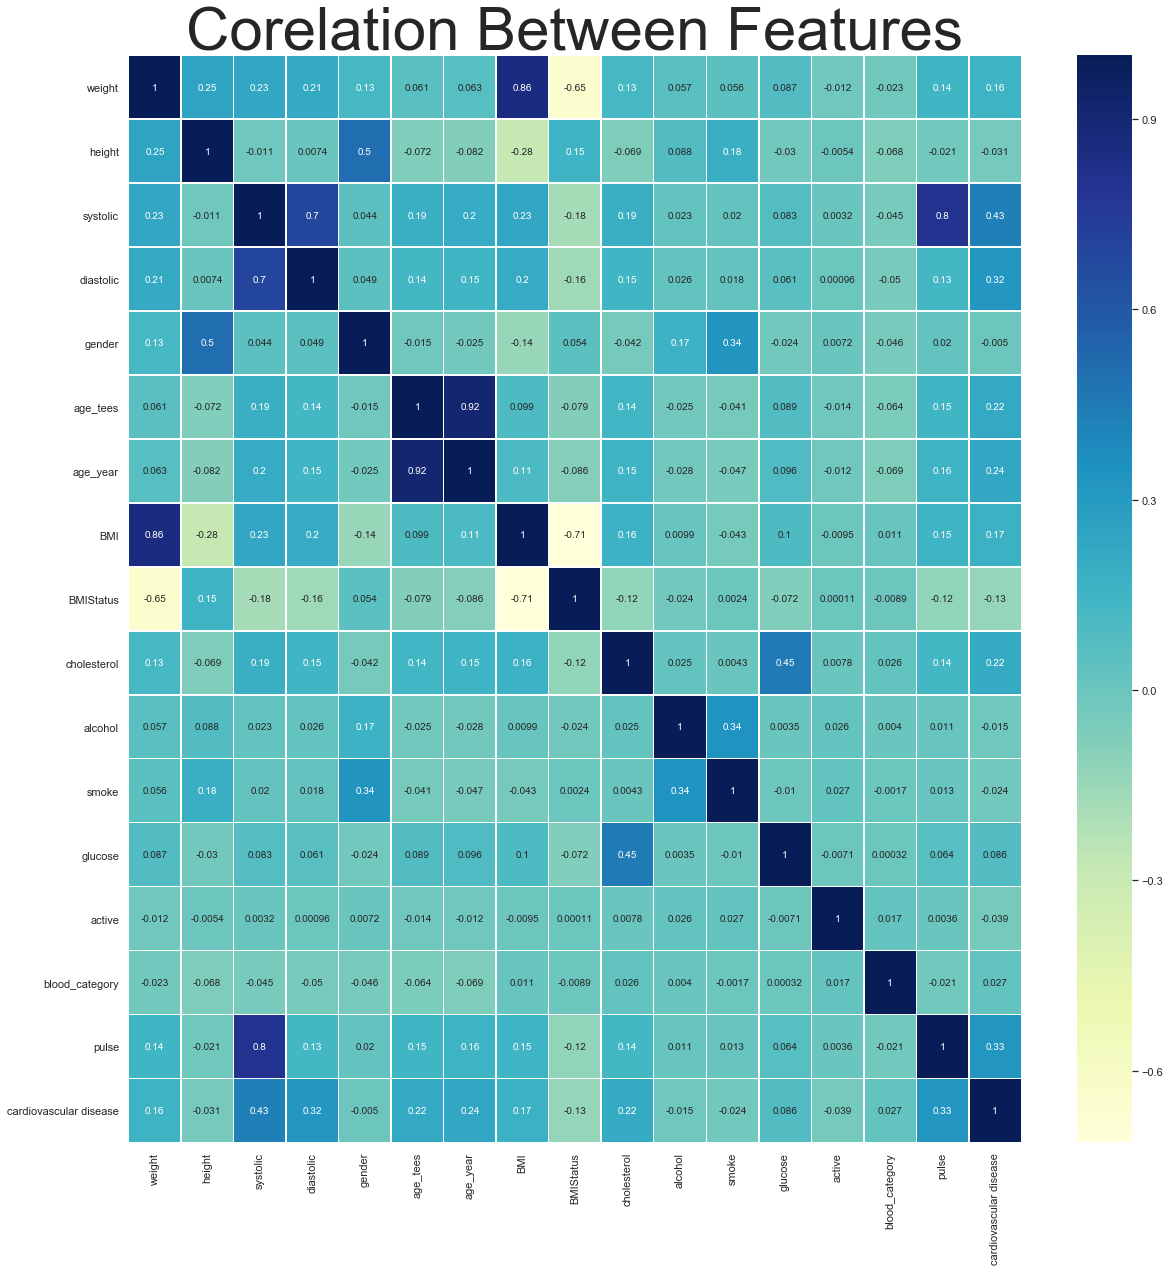

In [76]:


plt.rcParams['figure.figsize'] = (20, 20) 
ax=sns.heatmap(CardiovascularDS_DS.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom +.5,top-.5)
plt.title('Corelation Between Features', fontsize = 60)
plt.show()

In [77]:
Final_CardiovascularDS_DS = CardiovascularDS_DS[["systolic","diastolic","age_year","cholesterol","pulse","cardiovascular disease"]].copy()
Final_CardiovascularDS_DS.head()


,systolic,diastolic,age_year,cholesterol,pulse,cardiovascular disease
0,110,80,50,1,30,0
1,140,90,55,3,50,1
2,130,70,52,3,60,1
3,150,100,48,1,50,1
4,100,60,48,1,40,0


In [78]:
x = Final_CardiovascularDS_DS.drop(['cardiovascular disease'], axis=1)
y = Final_CardiovascularDS_DS['cardiovascular disease']

In [79]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42, shuffle = True)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(x_test),len(x_train),len(x_test)*100/(len(x_test) + len(x_train))))

size of test dataset = 12022, size of traing data = 48086, percentage = 20.000665468822785%


In [271]:
params = { 
    'n_estimators': [10, 50, 100, 150, 200, 300, 400, 500],
    'max_depth' : [10,20,30,40,50],
    'criterion' : ['entropy','gini']
}

In [272]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV# Hyperparameter Tuning
rfc_gridcv = RandomForestClassifier(random_state=42)
rfc_gridcv = GridSearchCV(estimator=rfc_gridcv, param_grid=params, cv= 10, n_jobs = -1)
rfc_gridcv.fit(x_train, y_train)
print("Best Hyper Parameters:\n",rfc_gridcv.best_params_)



Best Hyper Parameters:
 {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}


In [274]:
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth= 10, criterion = 'entropy')
model_rf.fit(x_train, y_train)
ACC_train_rf = model_rf.score(x_train, y_train)
ACC_test_rf = model_rf.score(x_test, y_test)

print(ACC_train_rf)
print(ACC_test_rf)

0.7328744333069916
0.7267509565796041


In [275]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [277]:
params_for_l1 = { 
    'C' :  np.logspace(0, 4, 10),
    'solver' : ['liblinear', 'saga']
}

params_for_l2 = { 
    'C' :  np.logspace(0, 4, 10),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

params_for_elasticnet = { 
    'C' :  np.logspace(0, 4, 10),
    'l1_ratio' : np.arange (0.1, 1.0, 0.1),
    'solver' : ['saga']
}

In [279]:
from sklearn.linear_model import LogisticRegression
logreg_with_l1_gridcv = LogisticRegression(penalty = 'l1')
logreg_with_l1_gridcv = GridSearchCV(estimator=logreg_with_l1_gridcv, param_grid=params_for_l1, cv= 10, n_jobs = -1)
logreg_with_l1_gridcv.fit(x_train, y_train)
print("Best Hyper Parameters:\n",logreg_with_l1_gridcv.best_params_)

Best Hyper Parameters:
 {'C': 1.0, 'solver': 'liblinear'}


In [282]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(penalty = 'l1', C = 1, solver = 'liblinear')
model_lr.fit(x_train, y_train)
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)
print(ACC_train_lr)
print(ACC_test_lr)

0.7152809549557043
0.7200964897687573


In [285]:
from sklearn.linear_model import LogisticRegression
logreg_with_l2_gridcv = LogisticRegression(penalty = 'l2')
logreg_with_l2_gridcv = GridSearchCV(estimator=logreg_with_l2_gridcv, param_grid=params_for_l2, cv= 10, n_jobs = -1)
logreg_with_l2_gridcv.fit(x_train, y_train)
print("Best Hyper Parameters:\n",logreg_with_l2_gridcv.best_params_)

Best Hyper Parameters:
 {'C': 1.0, 'solver': 'newton-cg'}


In [286]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(penalty = 'l2', C = 1, solver = 'newton-cg')
model_lr.fit(x_train, y_train)
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)
print(ACC_train_lr)
print(ACC_test_lr)

0.7152809549557043
0.7200964897687573


In [287]:
logreg_with_elasticnet_gridcv = LogisticRegression(penalty = 'elasticnet')
logreg_with_elasticnet_gridcv = GridSearchCV(estimator=logreg_with_elasticnet_gridcv, param_grid=params_for_elasticnet, cv= 10, n_jobs = -1)
logreg_with_elasticnet_gridcv.fit(x_train, y_train)
print("Best Hyper Parameters:\n",logreg_with_elasticnet_gridcv.best_params_)

Best Hyper Parameters:
 {'C': 1.0, 'l1_ratio': 0.1, 'solver': 'saga'}


In [288]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(penalty = 'elasticnet', C = 1, solver = 'saga',l1_ratio = 0.1)
model_lr.fit(x_train, y_train)
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)
print(ACC_train_lr)
print(ACC_test_lr)

0.7152809549557043
0.7200964897687573


In [290]:
SVCparams = {'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001]}

In [ ]:
SVC_gridcv =  SVC()
SVC_gridcv = GridSearchCV(estimator=SVC_gridcv, param_grid=SVCparams, cv= 10, n_jobs = -1)
SVC_gridcv.fit(x_train, y_train)
print("Best Hyper Parameters:\n",SVC_gridcv.best_params_)

In [80]:
## logistic regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)

## Decision Trees
##from sklearn.tree import DecisionTreeClassifier 
##model_dt = DecisionTreeClassifier()
##model_dt.fit(x_train, y_train)
##ACC_train_dt = model_dt.score(x_train, y_train)
##ACC_test_dt = model_dt.score(x_test, y_test)

## Support Vector Machine
from sklearn.svm import SVC 
model_svm = SVC()
model_svm.fit(x_train, y_train)
ACC_train_svm = model_svm.score(x_train, y_train)
ACC_test_svm = model_svm.score(x_test, y_test)

## Support Vector Machine
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
ACC_train_rf = model_rf.score(x_train, y_train)
ACC_test_rf = model_rf.score(x_test, y_test)

## Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
ACC_train_nb = model_nb.score(x_train, y_train)
ACC_test_nb = model_nb.score(x_test, y_test)

## Neural Network
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier()
model_nn.fit(x_train,y_train)
ACC_train_nn = model_nn.score(x_train,y_train)
ACC_test_nn = model_nn.score(x_test,y_test)


from prettytable import PrettyTable
t = PrettyTable(['Accuracy', 'Logistic (%)'  , 'SVM (%)' , 'RF (%)', 'NB (%)', 'NN (%)'])
t.add_row(['Training', ACC_train_lr*100, ACC_train_svm*100, ACC_train_rf*100, ACC_train_nb*100,ACC_train_nn*100])
t.add_row(['Testing', ACC_test_lr*100, ACC_test_svm*100, ACC_test_rf*100, ACC_test_nb*100,ACC_train_nn*100])
print(t)

#from prettytable import PrettyTable
#t = PrettyTable(['Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)', 'NB (%)', 'NN (%)'])
#t.add_row(['Training', ACC_train_lr*100, ACC_train_dt*100, ACC_train_svm*100, ACC_train_rf*100, ACC_train_nb*100,ACC_train_nn*100])
#t.add_row(['Testing', ACC_test_lr*100, ACC_test_dt*100, ACC_test_svm*100, ACC_test_rf*100, ACC_test_nb*100,ACC_train_nn*100])
#print(t)

/Users/ahmad.zeidan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ahmad.zeidan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ahmad.zeidan/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


+----------+-------------------+-------------------+-------------------+-------------------+-------------------+
| Accuracy |    Logistic (%)   |      SVM (%)      |       RF (%)      |       NB (%)      |       NN (%)      |
+----------+-------------------+-------------------+-------------------+-------------------+-------------------+
| Training | 71.52393628083018 |  73.2104978580044 | 73.95707690388055 | 71.65495154514826 | 71.57384685771326 |
| Testing  | 71.99301280984861 | 72.20096489768757 | 71.85992347363167 | 71.95974047579438 | 71.57384685771326 |
+----------+-------------------+-------------------+-------------------+-------------------+-------------------+


In [294]:
#x = Final_CardiovascularDS_DS.drop(['cardiovascular disease'], axis=1)
#y = Final_CardiovascularDS_DS['cardiovascular disease']

from sklearn.metrics import classification_report # text report showing the main classification metrics
from sklearn.metrics import confusion_matrix #to get confusion_matirx 

from sklearn.model_selection import cross_val_score
cv_value = 10
##LR
from sklearn.linear_model import LogisticRegression
ACC_test_lr = cross_val_score(LogisticRegression(),x,y,cv = cv_value)

##DT
#from sklearn.tree import DecisionTreeClassifier
#ACC_test_dt = cross_val_score(DecisionTreeClassifier(),x,y,cv = cv_value)

##SVM
from sklearn.svm import SVC
ACC_test_svm = cross_val_score(SVC(),x,y,cv = cv_value)

##RF
from sklearn.ensemble import RandomForestClassifier
ACC_test_rf = cross_val_score(RandomForestClassifier(),x,y,cv = cv_value)

##NB
from sklearn.naive_bayes import GaussianNB
ACC_test_nb = cross_val_score(GaussianNB(),x,y,cv = cv_value)

ACC_test_lr_mean = np.mean(ACC_test_lr);
#ACC_test_dt_mean = np.mean(ACC_test_dt);
ACC_test_svm_mean = np.mean(ACC_test_svm);
ACC_test_rf_mean = np.mean(ACC_test_rf);
ACC_test_nb_mean = np.mean(ACC_test_nb);


from prettytable import PrettyTable
t = PrettyTable(['Accuracy', 'Logistic (%)'  , 'SVM (%)' , 'RF (%)', 'NB (%)'])
t.add_row(['Testing', ACC_test_lr_mean*100, ACC_test_svm_mean*100, ACC_test_rf_mean*100, ACC_test_nb_mean*100])
print(t)

#from prettytable import PrettyTable
#t = PrettyTable(['Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)', 'NB (%)'])
#t.add_row(['Testing', ACC_test_lr_mean*100, ACC_test_dt_mean*100, ACC_test_svm_mean*100, ACC_test_rf_mean*100, ACC_test_nb_mean*100])
#print(t)

/Users/ahmad.zeidan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ahmad.zeidan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ahmad.zeidan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ahmad.zeidan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ahmad.zeidan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: 

+----------+-------------------+-------------------+-------------------+-------------------+
| Accuracy |    Logistic (%)   |      SVM (%)      |       RF (%)      |       NB (%)      |
+----------+-------------------+-------------------+-------------------+-------------------+
| Testing  | 71.64603230889857 | 71.87728804368727 | 71.60277246294709 | 71.71423201542109 |
+----------+-------------------+-------------------+-------------------+-------------------+


In our case :

True Positive : No of Cases Predicted with CVD and Actually had CVD
True Negative : No of Cases Predicted with No CVD and Actually had No CVD
False Positive : No of Cases Predicted with CVD and Actually had No CVD
False Negative : No of Cases Predicted with No CVD and Actually had CVD

In [295]:
y_predict = model_lr.predict(x_test)
print(classification_report(y_test, y_predict))
print('LR True Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][1]))
print('LR True Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][0]))
print('LR False Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][1]))
print('LR False Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][0]))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      6196
           1       0.75      0.63      0.69      5826

    accuracy                           0.72     12022
   macro avg       0.73      0.72      0.72     12022
weighted avg       0.72      0.72      0.72     12022

LR True Positive Cases : 3673
LR True Negative Cases : 4984
LR False Positive Cases : 1212
LR False Negative Cases : 2153


In [296]:
y_predict = model_svm.predict(x_test)
print(classification_report(y_test, y_predict))
print('SVM True Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][1]))
print('SVM True Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][0]))
print('SVM False Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][1]))
print('SVM False Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][0]))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76      6196
           1       0.76      0.64      0.69      5826

    accuracy                           0.73     12022
   macro avg       0.73      0.73      0.72     12022
weighted avg       0.73      0.73      0.73     12022

SVM True Positive Cases : 3701
SVM True Negative Cases : 5055
SVM False Positive Cases : 1141
SVM False Negative Cases : 2125


In [297]:
y_predict = model_rf.predict(x_test)
print(classification_report(y_test, y_predict))
print('RF True Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][1]))
print('RF True Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][0]))
print('RF False Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][1]))
print('RF False Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][0]))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6196
           1       0.74      0.65      0.69      5826

    accuracy                           0.72     12022
   macro avg       0.72      0.72      0.72     12022
weighted avg       0.72      0.72      0.72     12022

RF True Positive Cases : 3776
RF True Negative Cases : 4856
RF False Positive Cases : 1340
RF False Negative Cases : 2050


In [298]:
y_predict = model_nb.predict(x_test)
print(classification_report(y_test, y_predict))
print('NB True Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][1]))
print('NB True Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][0]))
print('NB False Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][1]))
print('NB False Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][0]))

              precision    recall  f1-score   support

           0       0.69      0.84      0.75      6196
           1       0.77      0.60      0.67      5826

    accuracy                           0.72     12022
   macro avg       0.73      0.72      0.71     12022
weighted avg       0.73      0.72      0.72     12022

NB True Positive Cases : 3475
NB True Negative Cases : 5176
NB False Positive Cases : 1020
NB False Negative Cases : 2351


In [84]:
from sklearn.metrics import classification_report # text report showing the main classification metrics
from sklearn.metrics import confusion_matrix #to get confusion_matirx 
y_predict = model_nn.predict(x_test)
print(classification_report(y_test, y_predict))
print('NN True Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][1]))
print('NN True Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][0]))
print('NN False Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][1]))
print('NN False Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][0]))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      6196
           1       0.75      0.63      0.69      5826

    accuracy                           0.72     12022
   macro avg       0.72      0.72      0.72     12022
weighted avg       0.72      0.72      0.72     12022

NN True Positive Cases : 3692
NN True Negative Cases : 4949
NN False Positive Cases : 1247
NN False Negative Cases : 2134


In [85]:
y_pred_prob = model_nn.predict_proba(x_test)

In [86]:
from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score, f1_score 
print("Sensitivity (recall) score: ", recall_score(y_test,y_predict))
print("precision score: ", precision_score(y_test,y_predict))
print("f1 score: ", f1_score(y_test,y_predict))
print("accuracy score: ", accuracy_score(y_test,y_predict))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

Sensitivity (recall) score:  0.6337109509097151
precision score:  0.7475197408382264
f1 score:  0.6859266140269391
accuracy score:  0.7187655964065879
ROC AUC: 0.7859188939986973


We trained KNN, RandomForest and Logistic Regression with different penality and reveived almost similar results.

Here We dealing with a problem of a disease impacting a human health. So, We can't put someone's health in danger with our reckless decision

We need to have an accurate model.

In such cases, it's not a big threat if our model predict a Non CVD case as CVD (False Positive) because medical staff can later examine him/her.

But We can't risk of predicting a CVD case as Non CVD (False Negative) because in that case we'll be jeopardizing with that person's life.

Considering False Negative as a major factor, We will choose Random Forest as our model for the probelm since it's having the fine accuracy with Lower False Negative Cases

In [1]:

from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
ACC_train_rf = model_rf.score(x_train, y_train)
ACC_test_rf = model_rf.score(x_test, y_test)
y_predict = model_rf.predict(x_test)
print(classification_report(y_test, y_predict))
print('RF True Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][1]))
print('RF True Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][0]))
print('RF False Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][1]))
print('RF False Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][0]))

NameError: name 'x_train' is not defined

In [303]:
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth= 10, criterion = 'entropy')
model_rf.fit(x_train, y_train)
ACC_train_rf = model_rf.score(x_train, y_train)
ACC_test_rf = model_rf.score(x_test, y_test)

print(ACC_train_rf)
print(ACC_test_rf)

y_predict = model_rf.predict(x_test)
print(classification_report(y_test, y_predict))
print('RF True Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][1]))
print('RF True Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][0]))
print('RF False Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][1]))
print('RF False Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][0]))

0.7320633864326416
0.7274164032606887
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6196
           1       0.75      0.66      0.70      5826

    accuracy                           0.73     12022
   macro avg       0.73      0.73      0.73     12022
weighted avg       0.73      0.73      0.73     12022

RF True Positive Cases : 3840
RF True Negative Cases : 4905
RF False Positive Cases : 1291
RF False Negative Cases : 1986


In [90]:
CardiovascularDS_DS.head()

,weight,height,systolic,diastolic,gender,age_tees,age_year,BMI,BMIStatus,cholesterol,alcohol,smoke,glucose,active,blood_category,pulse,cardiovascular disease
0,62.0,168,110,80,2,2,50,21.967120,1,1,0,0,1,1,1,30,0
1,85.0,156,140,90,1,3,55,34.927679,0,3,0,0,1,1,2,50,1
2,64.0,165,130,70,1,3,52,23.507805,1,3,0,0,1,0,1,60,1
3,82.0,169,150,100,2,2,48,28.710479,0,1,0,0,1,1,2,50,1
4,56.0,156,100,60,1,2,48,23.011177,1,1,0,0,1,0,3,40,0


In [91]:
Test_CardiovascularDS_DS = CardiovascularDS_DS[["weight","height","systolic","diastolic","age_year","cholesterol","alcohol","smoke","glucose","active","cardiovascular disease"]].copy()
Test_CardiovascularDS_DS.head()

,weight,height,systolic,diastolic,age_year,cholesterol,alcohol,smoke,glucose,active,cardiovascular disease
0,62.0,168,110,80,50,1,0,0,1,1,0
1,85.0,156,140,90,55,3,0,0,1,1,1
2,64.0,165,130,70,52,3,0,0,1,0,1
3,82.0,169,150,100,48,1,0,0,1,1,1
4,56.0,156,100,60,48,1,0,0,1,0,0


In [92]:
xx = Test_CardiovascularDS_DS.drop(['cardiovascular disease'], axis=1)
yy = Test_CardiovascularDS_DS['cardiovascular disease']

In [93]:
from sklearn.model_selection import train_test_split

xx_train, xx_test, yy_train, yy_test = train_test_split(xx,yy,test_size=0.2,random_state=42, shuffle = True)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(xx_test),len(xx_train),len(xx_test)*100/(len(xx_test) + len(xx_train))))

size of test dataset = 12022, size of traing data = 48086, percentage = 20.000665468822785%


In [95]:
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier()
model_nn.fit(xx_train,yy_train)
ACC_train_nn = model_nn.score(xx_train,yy_train)
ACC_test_nn = model_nn.score(xx_test,yy_test)

print(ACC_train_nn)
print(ACC_test_nn)

0.7049245102524644
0.7116120445849277
